In [169]:
import pandas as pd
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
import statsmodels.distributions.empirical_distribution as distr
import seaborn as sns
from statsmodels.stats.descriptivestats import sign_test
plt.style.use('ggplot')

In [170]:
DF = pd.read_excel(r'C:\Users\Админ\Python\бдз\Задание к бдз\data_matstat_K5.xls', sheet_name=1)

In [171]:
DF.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,A17,A18,A19,A20
0,1061,Alaska Pacific University,AK,IIB,454,382,362,382,N,567,485,471,487,N,6,11,9,4,32,N
1,1063,Univ.Alaska-Fairbanks,AK,I,686,560,432,508,Y,914,753,572,677,Y,74,125,118,40,404,Y
2,1065,Univ.Alaska-Southeast,AK,IIA,533,494,329,415,N,716,663,442,559,Y,9,26,20,9,70,N
3,11462,Univ.Alaska-Anchorage,AK,IIA,612,507,414,498,Y,825,681,557,670,Y,115,124,101,21,392,Y
4,1002,Alabama Agri.&Mech. Univ.,AL,IIA,442,369,310,350,N,530,444,376,423,N,59,77,102,24,262,N


In [172]:
tasks =  pd.read_excel(r'C:\Users\Админ\Python\бдз\Задание к бдз\var_matstat_K5.xls')
tasks

,№ задания Вариант,1.1,1.2,"2.1, 3.1","2.2, 3.2","2.3, 3.3","2.4, 3.4",4,5,6,7,8.1,8.2,9.1,9.2,9.3
0,1,A5 A6 A7,A5,A5,A5,A5 A6,A5 A6,A5,A5 A6,A4 A9,A4 A5,A5 A6,A5 A6 A7,A15 A10,A15 A10,A15 A5 A10
1,2,B7 B8 B9,B7,B7,B7,B11 B12,B11 B12,B7,B11 B12,B3 B5,B6 B1,B11 B12,B7 B8 B9,B1 B2,B1 B2,B1 B4 B2
2,3,C6 C7 C8,C6,C6,C6,C13 C14,C13 C14,C6,C13 C14,С2 С3,С3 С4,C13 C14,C6 C7 C8,С6 С13,С6 С13,С6 С4 С13
3,4,D1 D5 D6,D1,D1,D1,D1 D2,D1 D2,D1,D1 D2,D7 D8,D7 D1,D1 D2,D1 D2 D3,D4 D1,D4 D1,D4 D6 D1
4,5,A6 A7 A8,A6,A6,A6,A6 A7,A6 A7,A6,A6 A7,A4 A14,A4 A6,A6 A7,A6 A7 A8,A16 A11,A16 A11,A16 A6 A11
5,6,B10 B11 B12,B10,B10,B10,B10 B11,B10 B11,B10,B10 B11,B3 B6,B6 B2,B10 B11,B10 B11 B12,B7 B2,B7 B2,B7 B4 B2
6,7,C9 C10 C11,C9,C9,C9,C11 C12,C11 C12,C9,C11 C12,С2 С5,С5 С4,C11 C12,C9 C10 C11,С11 С13,С11 С13,С11 С4 С13
7,8,D2 D9 D10,D2,D2,D2,D1 D3,D1 D3,D2,D1 D3,D7 D12,D7 D2,D1 D5,D1 D5 D6,D5 D1,D5 D1,D5 D6 D1
8,9,A5 A7 A8,A7,A7,A7,A7 A8,A7 A8,A7,A7 A8,A4 A20,A4 A7,A7 A8,A5 A7 A8,A17 A12,A17 A12,A17 A7 A12
9,10,B13 B14 B15,B13,B13,B13,B13 B14,B13 B14,B13,B13 B14,B5 B6,B3 B13,B13 B14,B13 B14 B15,B8 B2,B8 B2,B8 B4 B2


In [173]:
task = tasks.loc[[12]]
task

,№ задания Вариант,1.1,1.2,"2.1, 3.1","2.2, 3.2","2.3, 3.3","2.4, 3.4",4,5,6,7,8.1,8.2,9.1,9.2,9.3
12,13,A5 A6 A8,A8,A8,A8,A5 A8,A5 A8,A8,A5 A8,A9 A14,A4 A8,A5 A8,A5 A6 A8,A15 A13,A15 A13,A15 A5 A13


In [174]:
x = DF['A5']
y = DF['A6']
z = DF['A8']

1.1 Объём выборки	
Среднее	
Выборочная дисперсия	
Выборочное среднеквадратическое отклонение	
Выборочный коэффициент асимметрии	
Выборочный эксцесс	

In [175]:
sts.describe(x), sts.describe(x)[3]**(1/2)

(DescribeResult(nobs=1073, minmax=(270, 1009), mean=526.4836905871389, variance=13868.856310247458, skewness=0.6786486256734204, kurtosis=0.5304432832288937),
 117.7661084958124)

In [176]:
sts.describe(y), sts.describe(y)[3]**(1/2)

(DescribeResult(nobs=1073, minmax=(234, 733), mean=420.04193849021436, variance=4957.764097731288, skewness=0.3481481718850067, kurtosis=0.17581685259992685),
 70.4113918178819)

In [177]:
sts.describe(z), sts.describe(z)[3]**(1/2)

(DescribeResult(nobs=1073, minmax=(232, 866), mean=428.0326188257223, variance=8217.62113651222, skewness=0.8191411695756438, kurtosis=0.9757478446505425),
 90.6510956167228)

1.2. Группировка и гистограммы частот

In [178]:
x = DF['A8']

In [179]:
sts.describe(x)

DescribeResult(nobs=1073, minmax=(232, 866), mean=428.0326188257223, variance=8217.62113651222, skewness=0.8191411695756438, kurtosis=0.9757478446505425)

In [180]:
bins = int(np.floor(1 + np.log2(len(x))))
bins

11

In [181]:
h = (max(x) - min(x)) / bins
print('ширина интервалов', h)

ширина интервалов 57.63636363636363


Анализируемый признак –
Объём выборки –

а) Выбрать число групп
б) Построить таблицу частот
в) Построить гистограммы частот и полигоны частот
г) Построить график эмпирической функции распределения

частоты  [ 30. 172. 290. 255. 145. 118.  40.  13.   6.   2.   2.]
относительные частоты [0.02795899 0.16029823 0.27027027 0.23765144 0.13513514 0.10997204
 0.03727866 0.01211556 0.0055918  0.00186393 0.00186393]
накопленные частоты  [  30.  202.  492.  747.  892. 1010. 1050. 1063. 1069. 1071. 1073.]
относительные накопленные частоты [0.02795899 0.18825722 0.45852749 0.69617894 0.83131407 0.94128611
 0.97856477 0.99068034 0.99627213 0.99813607 1.        ]


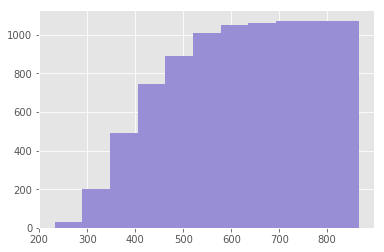

In [182]:
print('частоты ',plt.hist(x, bins = bins)[0])
print('относительные частоты',plt.hist(x, bins = bins, density=True)[0]*h)
print('накопленные частоты ',plt.hist(x, bins = bins, cumulative=True)[0])
print('относительные накопленные частоты',plt.hist(x, bins = bins, cumulative=True,density=True)[0])

[232.         289.63636364 347.27272727 404.90909091 462.54545455
 520.18181818 577.81818182 635.45454545 693.09090909 750.72727273
 808.36363636 866.        ]


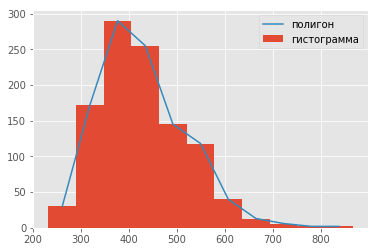

In [183]:
intervals = np.linspace(min(x),max(x), bins+1)
print(intervals)
intervals += (intervals[1]-intervals[0])/2
plt.plot(intervals[:-1],plt.hist(x, bins = bins, label='гистограмма')[0], label='полигон')
plt.legend()

[232.         289.63636364 347.27272727 404.90909091 462.54545455
 520.18181818 577.81818182 635.45454545 693.09090909 750.72727273
 808.36363636 866.        ]


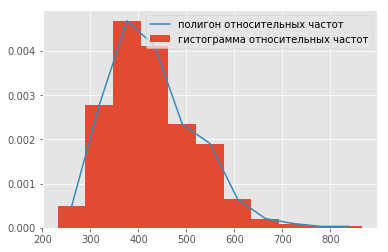

In [186]:
intervals = np.linspace(min(x),max(x), bins+1)
print(intervals)
intervals += (intervals[1]-intervals[0])/2
plt.plot(intervals[:-1],plt.hist(x, bins = bins, label='гистограмма относительных частот', density=True)[0], 
         label='полигон относительных частот')
plt.legend()

[232.         289.63636364 347.27272727 404.90909091 462.54545455
 520.18181818 577.81818182 635.45454545 693.09090909 750.72727273
 808.36363636 866.        ]


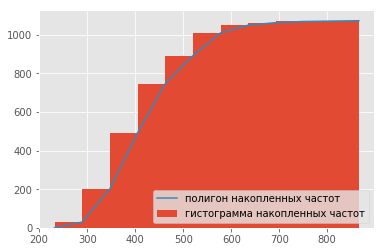

In [199]:
intervals = np.linspace(min(x),max(x), bins+1)
print(intervals)
y_axis = np.zeros(1)
y_axis = np.hstack((y_axis,plt.hist(x, bins = bins, label='гистограмма накопленных частот', cumulative=True)[0]))
plt.plot(intervals,y_axis, 
         label='полигон накопленных частот')
plt.legend(loc=4)

[232.         289.63636364 347.27272727 404.90909091 462.54545455
 520.18181818 577.81818182 635.45454545 693.09090909 750.72727273
 808.36363636 866.        ]


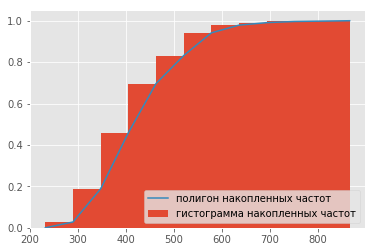

In [201]:
intervals = np.linspace(min(x),max(x), bins+1)
print(intervals)
y_axis = np.zeros(1)
y_axis = np.hstack((y_axis,plt.hist(x, bins = bins, label='гистограмма накопленных частот', cumulative=True, density=True)[0]))
plt.plot(intervals,y_axis, 
         label='полигон накопленных частот')
plt.legend(loc=4)

Построить ЭФР

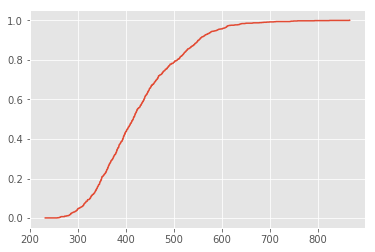

In [203]:
ecdf = distr.ECDF(x)
x_axis = np.linspace(min(x),max(x),1000)
plt.plot(x_axis,ecdf(x_axis))

Интервальные оценки

2.1. Доверительные интервалы для мат. ожидания

Анализируемый признак 

Объём выборки

Оцениваемый параметр


In [204]:
task

,№ задания Вариант,1.1,1.2,"2.1, 3.1","2.2, 3.2","2.3, 3.3","2.4, 3.4",4,5,6,7,8.1,8.2,9.1,9.2,9.3
12,13,A5 A6 A8,A8,A8,A8,A5 A8,A5 A8,A8,A5 A8,A9 A14,A4 A8,A5 A8,A5 A6 A8,A15 A13,A15 A13,A15 A5 A13


In [205]:
x = DF['A8']

In [206]:
sts.describe(x)

DescribeResult(nobs=1073, minmax=(232, 866), mean=428.0326188257223, variance=8217.62113651222, skewness=0.8191411695756438, kurtosis=0.9757478446505425)

Доверительный интервал для матожидания

In [207]:
for alpha in [0.01,0.05,0.1]:
    n=sts.describe(x)[0]
    low = x.mean() - sts.describe(x)[3]**(1/2) / (n**(1/2)) * sts.t.ppf(1-alpha/2,df=n-1)
    high = x.mean() + sts.describe(x)[3]**(1/2) / (n**(1/2)) * sts.t.ppf(1-alpha/2,df=n-1)
    print(alpha,':',low,x.mean(),high)

0.01 : 420.89153457926255 428.0326188257223 435.17370307218204
0.05 : 422.60246785148496 428.0326188257223 433.46276979995963
0.1 : 423.47670060495653 428.0326188257223 432.58853704648806


Доверительный интервал для дисперсии

In [209]:
for alpha in [0.01,0.05,0.1]:
    n=sts.describe(x)[0]
    low = (n-1) * sts.describe(x)[3] / (sts.chi2.ppf(1-alpha/2,df=n-1))
    high = (n-1) * sts.describe(x)[3] / (sts.chi2.ppf(alpha/2,df=n-1))
    print(alpha,':',low,sts.describe(x)[3],high)

0.01 : 7371.64799730444 8217.62113651222 9210.031517920674
0.05 : 7564.010893742589 8217.62113651222 8960.215662750725
0.1 : 7665.036398218402 8217.62113651222 8835.871401159964


2.3
Доверительный интервал для разности мат ожиданий

In [210]:
task

,№ задания Вариант,1.1,1.2,"2.1, 3.1","2.2, 3.2","2.3, 3.3","2.4, 3.4",4,5,6,7,8.1,8.2,9.1,9.2,9.3
12,13,A5 A6 A8,A8,A8,A8,A5 A8,A5 A8,A8,A5 A8,A9 A14,A4 A8,A5 A8,A5 A6 A8,A15 A13,A15 A13,A15 A5 A13


In [211]:
x = DF['A5']
y = DF['A8']

In [212]:
for alpha in [0.01,0.05,0.1]:
    n1=sts.describe(x)[0]
    n2=sts.describe(y)[0]
    s = abs((sts.describe(x)[3]+sts.describe(y)[3])/2)**(1/2)
    low = x.mean()-y.mean()-sts.t.ppf(1-alpha/2, df=n1+n2-2) * s * ((1/n1+1/n2)**(1/2))
    high = x.mean()-y.mean()+sts.t.ppf(1-alpha/2, df=n1+n2-2) * s * ((1/n1+1/n2)**(1/2))
    print(alpha,':',low,x.mean()-y.mean(),high)

0.01 : 86.75426715866607 98.45107176141659 110.1478763641671
0.05 : 89.55380320157862 98.45107176141659 107.34834032125455
0.1 : 90.9852379876537 98.45107176141659 105.91690553517947


2.4
Доверительный интервал для отношений дисперсий

In [215]:
for alpha in [0.01,0.05,0.1]:
    n1=sts.describe(x)[0]
    n2=sts.describe(y)[0]
    s1 = sts.describe(x)[3]
    s2 = sts.describe(y)[3]
    low = s1/s2 * sts.f.ppf(alpha/2,dfd=n2-1,dfn=n1-1)
    high = s1/s2 * sts.f.ppf(1-alpha/2,dfd=n2-1,dfn=n1-1)
    print(alpha,':',low,(s1/s2),high)

0.01 : 1.4418157917941776 1.6876972155148267 1.9755102610660702
0.05 : 1.4971711896967779 1.6876972155148267 1.9024690769219053
0.1 : 1.526297702994823 1.6876972155148267 1.866164042354036


3. Проверка статистических гипотез о математических ожиданиях и дисперсиях
3.1. Проверка статистических гипотез о математических ожиданиях

In [216]:
x=DF['A8']
task

,№ задания Вариант,1.1,1.2,"2.1, 3.1","2.2, 3.2","2.3, 3.3","2.4, 3.4",4,5,6,7,8.1,8.2,9.1,9.2,9.3
12,13,A5 A6 A8,A8,A8,A8,A5 A8,A5 A8,A8,A5 A8,A9 A14,A4 A8,A5 A8,A5 A6 A8,A15 A13,A15 A13,A15 A5 A13


In [217]:
sts.describe(x)

DescribeResult(nobs=1073, minmax=(232, 866), mean=428.0326188257223, variance=8217.62113651222, skewness=0.8191411695756438, kurtosis=0.9757478446505425)

In [220]:
def ztest(x, m, sigma=None):
    if sigma is None:
        sigma = sts.describe(x)[3]**(1/2)
    z = (x.mean()-m)/(sigma/np.sqrt(x.size))
    p = min(sts.t.cdf(z,df=len(x)-1),1 - sts.t.cdf(z,df=len(x)-1))*2
    return z, p

m0_arr = [420,425,430]
for m in m0_arr:
    print('m =',m, 'z-val',ztest(x,m)[0],' p-val',ztest(x,m)[1])

m = 420 z-val 2.902578421920758  p-val 0.0037768199394208057
m = 425 z-val 1.0958336448462918  p-val 0.2733977049316345
m = 430 z-val -0.7109111322281747  p-val 0.47729394939688297


In [221]:
for m in m0_arr:
    print('m =',m, 'z-val',sts.ttest_1samp(x,m)[0],' p-val',sts.ttest_1samp(x,m)[1])

m = 420 z-val 2.9025784219207584  p-val 0.0037768199394206765
m = 425 z-val 1.095833644846292  p-val 0.27339770493163434
m = 430 z-val -0.7109111322281748  p-val 0.47729394939688297


In [222]:
sts.describe(x)

DescribeResult(nobs=1073, minmax=(232, 866), mean=428.0326188257223, variance=8217.62113651222, skewness=0.8191411695756438, kurtosis=0.9757478446505425)

3.2 Проверка статистических гипотез о дисперсиях

In [226]:
def chisquaretest(X1,sigma, mu = None):
    n = X1.size
    if mu is None:
        z = (n-1) * X1.var() / (sigma ** 2)
        p = 2 * min(sts.chi2.cdf(z, n-1),1-sts.chi2.cdf(z, n-1))
    else:
        z = n * (sigma0(X1,mu)**2) / (sigma ** 2)
        p = 2 * min(sts.chi2.cdf(z, n), 1 - sts.chi2.cdf(z, n))
    return z, p

s_arr = [86,90,93]
print(np.var(x)**(1/2))
for s in s_arr:
    print('s =',s, 'z-val',chisquaretest(x,s)[0],' p-val',chisquaretest(x,s)[1])

90.60884388027851
s = 86 z-val 1191.0884070228628  p-val 0.012536155623787293
s = 90 z-val 1087.566649177913  p-val 0.7271224188779171
s = 93 z-val 1018.5327619772337  p-val 0.24603516014479926


3.3. Проверка статистических гипотез о равенстве математических ожиданий

In [229]:
task

,№ задания Вариант,1.1,1.2,"2.1, 3.1","2.2, 3.2","2.3, 3.3","2.4, 3.4",4,5,6,7,8.1,8.2,9.1,9.2,9.3
12,13,A5 A6 A8,A8,A8,A8,A5 A8,A5 A8,A8,A5 A8,A9 A14,A4 A8,A5 A8,A5 A6 A8,A15 A13,A15 A13,A15 A5 A13


In [230]:
x = DF['A5']
y = DF['A8']
sts.describe(y)

DescribeResult(nobs=1073, minmax=(232, 866), mean=428.0326188257223, variance=8217.62113651222, skewness=0.8191411695756438, kurtosis=0.9757478446505425)

In [231]:
sts.ttest_ind(x,y)

Ttest_indResult(statistic=21.699867460073605, pvalue=1.484390672999057e-94)

In [232]:
def ttest(x, y):
    z = (np.mean(x) - np.mean(y))/np.sqrt(sts.describe(x)[3]/len(x)+sts.describe(y)[3]/len(y))
    p = 2*min(sts.t.cdf(z, df=len(x)+len(y)-2),1-sts.t.cdf(z, df=len(x)+len(y)-2))
    return z, p
ttest(x,y)


(21.699867460073605, 0.0)

3.4. Проверка статистических гипотез о равенстве дисперсий

In [233]:
def ftest(X1, X2):    
    f = sts.describe(X1)[3]/sts.describe(X2)[3]
    df1 = X1.size - 1
    df2 = X2.size - 1
    p = 2 * min(1 - sts.f.cdf(f, df1, df2),sts.f.cdf(f, df1, df2))
    return f, p
print('z-st:',ftest(x,y)[0],'p-val:',ftest(x,y)[1])

z-st: 1.6876972155148267 p-val: 2.220446049250313e-16


4. Критерии согласия

In [235]:
task

,№ задания Вариант,1.1,1.2,"2.1, 3.1","2.2, 3.2","2.3, 3.3","2.4, 3.4",4,5,6,7,8.1,8.2,9.1,9.2,9.3
12,13,A5 A6 A8,A8,A8,A8,A5 A8,A5 A8,A8,A5 A8,A9 A14,A4 A8,A5 A8,A5 A6 A8,A15 A13,A15 A13,A15 A5 A13


In [236]:
x = DF['A8']

In [246]:
bins = 1 + np.floor(np.log2(len(x)))
bins = int(bins)
def zstat(x_obs, x_exp, n):
    z = sum(((x_obs-x_exp)**2)/x_exp)*n
    p = 1 - sts.chi2.cdf(z, df=len(x_exp)-3)
    return z, p

def chi2(x,bins=5):
    a = min(x)
    b = max(x)
    h = (b-a)/bins
    arr = np.zeros(bins)
    intervals = [0]*(bins)
    c = a
    for i in range(bins):
        intervals[i] = (c, c+h)
        c = c + h
    for i in range(len(x)):
        index = (x[i] - a) // h
        if index == bins:
            arr[int(index)-1] += 1
        else:
            arr[int(index)] += 1
    arr /= len(x)
    return arr, intervals

def z(x, mu, sigma):
    return (x-mu) / sigma

#H0: X~N
mu1=x.mean()
sigma1=sts.describe(x)[3]**(1/2)
x_obs, intervals = chi2(x,bins=bins)
x_exp = np.ones(bins)
for i in range(bins):
    x_exp[i] = sts.norm.cdf(z(intervals[i][1],mu1,sigma1)) - sts.norm.cdf(z(intervals[i][0],mu1,sigma1))
print('manual', sum((x_obs-x_exp)**2/x_exp)*len(x))
print('x_exp', x_exp)
print('x_obs',chi2(x, bins)[0])
print('intervals',chi2(x, bins)[1])
print('='*78)
print('H0: X~N', zstat(x_obs, x_exp,len(x)))
print('H0: X~N', sts.chisquare(x_obs*len(x), x_exp*len(x)))

manual 373.83479871680646
x_exp [4.81288857e-02 1.23075997e-01 2.12834734e-01 2.48965497e-01
 1.97015420e-01 1.05455871e-01 3.81687694e-02 9.33667472e-03
 1.54255280e-03 1.71997919e-04 1.29325910e-05]
x_obs [0.02795899 0.16029823 0.27027027 0.23765144 0.13513514 0.10997204
 0.03727866 0.01211556 0.0055918  0.00186393 0.00186393]
intervals [(232, 289.6363636363636), (289.6363636363636, 347.27272727272725), (347.27272727272725, 404.9090909090909), (404.9090909090909, 462.5454545454545), (462.5454545454545, 520.1818181818181), (520.1818181818181, 577.8181818181818), (577.8181818181818, 635.4545454545454), (635.4545454545454, 693.090909090909), (693.090909090909, 750.7272727272726), (750.7272727272726, 808.3636363636363), (808.3636363636363, 865.9999999999999)]
H0: X~N (373.83479871680646, 0.0)
H0: X~N Power_divergenceResult(statistic=373.8347987168064, pvalue=3.4556991821593925e-74)


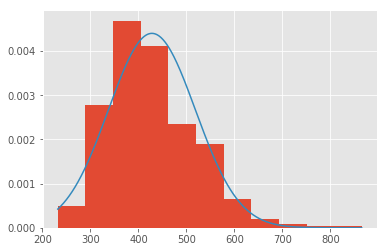

In [247]:
plt.hist(x,bins=bins, density=True)
plt.plot(np.arange(min(x),max(x)),sts.norm.pdf(np.arange(min(x),max(x)),loc=np.mean(x), scale=np.var(x)**(1/2)))

In [248]:
intervals, x_obs, x_obs*len(x)

([(232, 289.6363636363636),
  (289.6363636363636, 347.27272727272725),
  (347.27272727272725, 404.9090909090909),
  (404.9090909090909, 462.5454545454545),
  (462.5454545454545, 520.1818181818181),
  (520.1818181818181, 577.8181818181818),
  (577.8181818181818, 635.4545454545454),
  (635.4545454545454, 693.090909090909),
  (693.090909090909, 750.7272727272726),
  (750.7272727272726, 808.3636363636363),
  (808.3636363636363, 865.9999999999999)],
 array([0.02795899, 0.16029823, 0.27027027, 0.23765144, 0.13513514,
        0.10997204, 0.03727866, 0.01211556, 0.0055918 , 0.00186393,
        0.00186393]),
 array([ 30., 172., 290., 255., 145., 118.,  40.,  13.,   6.,   2.,   2.]))

Построить гистограмму относительных частот и функцию плотности теоретического распределения на одном графике

[]

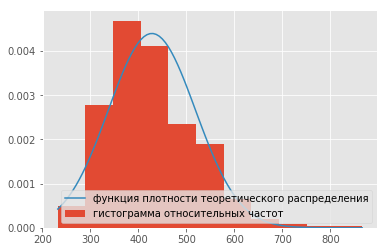

In [249]:
x_axis=np.linspace(min(x),max(x),100)
plt.hist(x,bins=bins, density=True,label='гистограмма относительных частот')
plt.plot(x_axis, sts.norm.pdf(x_axis,loc=x.mean(),scale=sts.describe(x)[3]**(1/2)), label='функция плотности теоретического распределения')
plt.legend(loc=4)
plt.plot()

4.2. Проверка гипотезы о нормальности на основе коэффициента асимметрии и эксцесса 

In [250]:
sts.jarque_bera(x)

(162.56186413710836, 0.0)

In [251]:
assim, excess = sts.describe(x)[4], sts.describe(x)[5]
jarque_bera = len(x) * (assim**2/6 + excess**2/24)
p = 1 - sts.chi2.cdf(jarque_bera, 2)
jarque_bera, p

(162.56186413710842, 0.0)

In [253]:
task

,№ задания Вариант,1.1,1.2,"2.1, 3.1","2.2, 3.2","2.3, 3.3","2.4, 3.4",4,5,6,7,8.1,8.2,9.1,9.2,9.3
12,13,A5 A6 A8,A8,A8,A8,A5 A8,A5 A8,A8,A5 A8,A9 A14,A4 A8,A5 A8,A5 A6 A8,A15 A13,A15 A13,A15 A5 A13


5.1 Критерий знаков


In [254]:
x = DF['A5']
y = DF['A8']

In [255]:
sts.describe(x)

DescribeResult(nobs=1073, minmax=(270, 1009), mean=526.4836905871389, variance=13868.856310247458, skewness=0.6786486256734204, kurtosis=0.5304432832288937)

In [256]:
sts.describe(y)

DescribeResult(nobs=1073, minmax=(232, 866), mean=428.0326188257223, variance=8217.62113651222, skewness=0.8191411695756438, kurtosis=0.9757478446505425)

In [257]:
sign_test(x-y)#по приколу тесты

(536.5, 2e-323)

In [258]:
sts.wilcoxon(x-y)#по приколу тесты

WilcoxonResult(statistic=0.0, pvalue=4.110515034106515e-177)

In [262]:
K = 0
for i in range(len(x)):
    if x[i]-y[i] > 0:
        K+=1
Z = 2 * np.sqrt(len(x)) * (K/len(x) - (1/2))
p = min(sts.norm.cdf(Z), 1 -sts.norm.cdf(Z))*2
print('Sign test: Zstat =',Z,' p-val =', p)

Sign test: Zstat = 32.7566787083184  p-val = 0.0


5.2. Критерий хи-квадрат

In [263]:
sts.chisquare(x,y) #дичь, так не надо делать

Power_divergenceResult(statistic=26491.49167365555, pvalue=0.0)

In [264]:
def chisquaretwosample(x, y, k):
    nx = x.size
    ny = y.size
    a = min(min(x), min(y))
    b = max(max(x), max(y))
    h = (b - a) / k
    intervals = [] 
    for i in range(k):
        intervals.append((a+h*i,a+h+h*i))
    fx = np.zeros(k)
    fy = np.zeros(k)
    c = a
    for item in x:
        index = (item - a) // h
        if index == bins:
            fx[int(index) - 1] += 1
        else:
            fx[int(index)] += 1
    for item in y:
        index = (item - a) // h
        if index == bins:
            fy[int(index) - 1] += 1
        else:
            fy[int(index)] += 1
    z = 0
    for i in range(k):
        z += ((fx[i]/nx - fy[i]/ny)**2) / (fx[i] + fy[i])
    z = z * nx * ny
    p = 1 - sts.chi2.cdf(z ,df=k-1)
    return z, p, intervals, fx, fy, fx/len(x), fy/len(x)

In [265]:
chisquaretwosample(x, y, bins)

(402.6320676583203,
 0.0,
 [(232.0, 302.6363636363636),
  (302.6363636363636, 373.27272727272725),
  (373.27272727272725, 443.9090909090909),
  (443.90909090909093, 514.5454545454545),
  (514.5454545454545, 585.1818181818182),
  (585.1818181818182, 655.8181818181818),
  (655.8181818181819, 726.4545454545455),
  (726.4545454545455, 797.0909090909091),
  (797.0909090909091, 867.7272727272727),
  (867.7272727272727, 938.3636363636364),
  (938.3636363636364, 1009.0)],
 array([  6.,  78., 186., 288., 207., 143., 102.,  41.,  11.,   7.,   4.]),
 array([ 53., 275., 345., 205., 138.,  41.,   9.,   5.,   2.,   0.,   0.]),
 array([0.0055918 , 0.07269338, 0.17334576, 0.26840634, 0.19291705,
        0.1332712 , 0.09506058, 0.03821062, 0.01025163, 0.00652377,
        0.00372787]),
 array([0.04939422, 0.25629077, 0.32152842, 0.19105312, 0.12861137,
        0.03821062, 0.0083877 , 0.00465983, 0.00186393, 0.        ,
        0.        ]))

In [266]:
sts.describe(x)

DescribeResult(nobs=1073, minmax=(270, 1009), mean=526.4836905871389, variance=13868.856310247458, skewness=0.6786486256734204, kurtosis=0.5304432832288937)

In [267]:
sts.describe(y)

DescribeResult(nobs=1073, minmax=(232, 866), mean=428.0326188257223, variance=8217.62113651222, skewness=0.8191411695756438, kurtosis=0.9757478446505425)

In [268]:
intervals = chisquaretwosample(x, y, bins)[2]
for i in range(bins):
    intervals[i] = intervals[i][0]
intervals.append(intervals[-1]+(intervals[1]-intervals[0]))


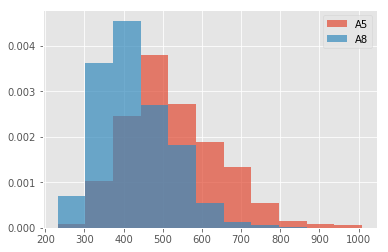

In [273]:
plt.hist(x, bins=intervals, label='A5', density=True, alpha=0.7)
plt.hist(y, bins=intervals, label='A8', density=True, alpha=0.7)
plt.legend()

6. Таблицы сопряжённости

In [279]:
task

,№ задания Вариант,1.1,1.2,"2.1, 3.1","2.2, 3.2","2.3, 3.3","2.4, 3.4",4,5,6,7,8.1,8.2,9.1,9.2,9.3
12,13,A5 A6 A8,A8,A8,A8,A5 A8,A5 A8,A8,A5 A8,A9 A14,A4 A8,A5 A8,A5 A6 A8,A15 A13,A15 A13,A15 A5 A13


In [297]:
#x и y категориальные признаки
x = DF['A9']
y = DF['A14']

In [301]:
x.values, y.values

(array(['N', 'Y', 'N', ..., 'N', 'N', 'Y'], dtype=object),
 array(['N', 'Y', 'Y', ..., 'N', 'N', 'Y'], dtype=object))

In [302]:
crossTab=pd.crosstab(x,y)
crossTab

A14,N,Y
A9,,
N,570,31
Y,22,450


In [303]:
sts.chi2_contingency(crossTab, correction=False)

(869.3179892080127,
 4.590391322035167e-191,
 1,
 array([[331.5862069, 269.4137931],
        [260.4137931, 211.5862069]]))

7. Дисперсионный анализ

In [328]:
x = DF['A4']#факторный признак
y = DF['A8']#результативный 

In [329]:
task

,№ задания Вариант,1.1,1.2,"2.1, 3.1","2.2, 3.2","2.3, 3.3","2.4, 3.4",4,5,6,7,8.1,8.2,9.1,9.2,9.3
12,13,A5 A6 A8,A8,A8,A8,A5 A8,A5 A8,A8,A5 A8,A9 A14,A4 A8,A5 A8,A5 A6 A8,A15 A13,A15 A13,A15 A5 A13


In [330]:
sts.describe(y)

DescribeResult(nobs=1073, minmax=(232, 866), mean=428.0326188257223, variance=8217.62113651222, skewness=0.8191411695756438, kurtosis=0.9757478446505425)

In [331]:
y.groupby(x).size()

A4
I      180
IIA    359
IIB    534
Name: A8, dtype: int64

In [332]:
y.groupby(x).var()

A4
I      7652.245810
IIA    4684.098411
IIB    4975.631318
Name: A8, dtype: float64

In [333]:
y.groupby(x).mean()

A4
I      533.666667
IIA    440.818942
IIB    383.829588
Name: A8, dtype: float64

In [334]:
for item in y.groupby(x): 
    print(sts.describe(item[1]))

DescribeResult(nobs=180, minmax=(362, 866), mean=533.6666666666666, variance=7652.245810055866, skewness=0.9172702569156433, kurtosis=1.2945630920451272)
DescribeResult(nobs=359, minmax=(308, 693), mean=440.81894150417827, variance=4684.0984111669595, skewness=0.6472828703761339, kurtosis=0.009055740676283008)
DescribeResult(nobs=534, minmax=(232, 638), mean=383.82958801498125, variance=4975.631318028824, skewness=0.8375392420106582, kurtosis=0.6350116848917904)


In [335]:
Dw = 0
for item in y.groupby(x): 
    Dw += sts.describe(item[1])[3]*(sts.describe(item[1])[0]-1)
Dw/=len(y)
print('Внутригрупповая дисперсия',Dw,'несмещ.',Dw*len(x)/(len(x)-3))

Внутригрупповая дисперсия 5310.969919577945 несмещ. 5325.86048944592


In [336]:
Db = 0
for item in y.groupby(x): 
    Db += sts.describe(item[1])[0]*(sts.describe(item[1])[2]-sts.describe(y)[2])**2
Db/=len(y)
print('Межгрупповая дисперсия',Db,'несмещ.', Db*len(x)/2)


Межгрупповая дисперсия 2898.9926697427436 несмещ. 1555309.567316982


In [337]:
print('Общая дисперсия', np.var(y))
print('Dw+Db =', Dw+Db)

Общая дисперсия 8209.962589320685
Dw+Db = 8209.962589320688


In [338]:
nusquare = Db / (Db + Dw)
print('ЭКД =', nusquare)
print('ЭКО =', np.sqrt(nusquare))

ЭКД = 0.3531066844949671
ЭКО = 0.5942278052186444


In [339]:
zstatFtest = Db / (len(y.groupby(x))-1) / Dw * (len(y)-len(y.groupby(x)))
pvalFtest = 1 - sts.f.cdf(zstatFtest, len(y.groupby(x))-1, len(y)-len(y.groupby(x)))
print('Дисперсионный анализ: Z-val',zstatFtest,' p-val', pvalFtest)

Дисперсионный анализ: Z-val 292.0297237224082  p-val 1.1102230246251565e-16


In [340]:
xarrr = []#чисто для проверки
for item in y.groupby(x): 
    xarrr.append(item[1])
print(sts.f_oneway(xarrr[0],xarrr[1],xarrr[2]))


F_onewayResult(statistic=292.02972372240845, pvalue=6.244173657733121e-102)


8. Корреляционный анализ


In [341]:
task

,№ задания Вариант,1.1,1.2,"2.1, 3.1","2.2, 3.2","2.3, 3.3","2.4, 3.4",4,5,6,7,8.1,8.2,9.1,9.2,9.3
12,13,A5 A6 A8,A8,A8,A8,A5 A8,A5 A8,A8,A5 A8,A9 A14,A4 A8,A5 A8,A5 A6 A8,A15 A13,A15 A13,A15 A5 A13


In [342]:
x=DF['A5']
y=DF['A8']

In [343]:
sts.pearsonr(x,y)

(0.9676495087428431, 0.0)

In [344]:
sts.spearmanr(x,y)

SpearmanrResult(correlation=0.964218164732936, pvalue=0.0)

In [345]:
sts.kendalltau(x,y)

KendalltauResult(correlation=0.8405274510615323, pvalue=0.0)

In [346]:
#доверительный интервал для линейного коэффициента корреляции
def proveinterval(r, n, alpha):
    u = sts.norm.ppf(1-alpha/2)
    high = r + r * (1-r**2)/(2*n) + u * (1 - r**2)/np.sqrt(n)
    low = r + r * (1-r**2)/(2*n) - u * (1 - r**2)/np.sqrt(n)
    return high, low

In [347]:
for alpha in [0.01,0.05,0.1]:
    print(alpha,'  low',proveinterval(sts.pearsonr(x,y)[0], len(x), alpha)[1],
                'high',proveinterval(sts.pearsonr(x,y)[0], len(x), alpha)[0])

0.01   low 0.9626727297979937 high 0.9726836923253493
0.05   low 0.9638695103109728 high 0.9714869118123702
0.1   low 0.9644818486319661 high 0.970874573491377


In [348]:
#проверка значимости коэффициентов корреляции
def zstat(r, n):
    z = r/((1-r**2)**(1/2)) * (n-2)**(1/2)
    p = min(sts.t.cdf(z, df = n-2), 1-sts.t.cdf(z, df = n-2))*2
    return z, p

In [349]:
zstat(sts.pearsonr(x,y)[0], len(x))

(125.51583082232548, 0.0)

In [350]:
zstat(sts.spearmanr(x,y)[0], len(x))

(119.02655851028635, 0.0)

In [351]:
def zstattau(t, n):
    z = t * np.sqrt(9*n*(n+1)/(2*(2*n+5)))
    p = min(sts.norm.cdf(z), 1-sts.norm.cdf(z))*2
    return z, p

In [352]:
zstattau(sts.kendalltau(x,y)[0], len(x))

(41.270521349340356, 0.0)

8.2 Расчёт множественных коэффициентов корреляции

In [354]:
task

,№ задания Вариант,1.1,1.2,"2.1, 3.1","2.2, 3.2","2.3, 3.3","2.4, 3.4",4,5,6,7,8.1,8.2,9.1,9.2,9.3
12,13,A5 A6 A8,A8,A8,A8,A5 A8,A5 A8,A8,A5 A8,A9 A14,A4 A8,A5 A8,A5 A6 A8,A15 A13,A15 A13,A15 A5 A13


In [355]:
x = DF['A5']
y = DF['A6']
z = DF['A8']

In [356]:
for num1, i in enumerate((x,y,z)):
    for num2, j in enumerate((x,y,z)):
        print(num1,num2,sts.kendalltau(i,j))

0 0 KendalltauResult(correlation=0.9999999999999999, pvalue=0.0)
0 1 KendalltauResult(correlation=0.8207843548296889, pvalue=0.0)
0 2 KendalltauResult(correlation=0.8405274510615323, pvalue=0.0)
1 0 KendalltauResult(correlation=0.8207843548296889, pvalue=0.0)
1 1 KendalltauResult(correlation=1.0, pvalue=0.0)
1 2 KendalltauResult(correlation=0.8129554569730247, pvalue=0.0)
2 0 KendalltauResult(correlation=0.8405274510615321, pvalue=0.0)
2 1 KendalltauResult(correlation=0.8129554569730247, pvalue=0.0)
2 2 KendalltauResult(correlation=1.0, pvalue=0.0)


In [357]:
sts.kendalltau(x,z)

KendalltauResult(correlation=0.8405274510615323, pvalue=0.0)

Рассчитать точечную оценку коэффициента конкордации

In [358]:
w = 2/9 * sum((sts.spearmanr(x, y)[0], sts.spearmanr(x, z)[0], sts.spearmanr(y, z)[0])) + 1/3
w

0.9707730897132811

In [359]:
w = 12/(3*(len(x)**3-len(x))) * sum((sts.rankdata(x)+sts.rankdata(y)+sts.rankdata(x)-3*(len(x)+1)/2)**2) 
w

2.9372027444973017

In [360]:
k = 3
n = len(x)
w = 0
for i in range(n):
    w += (sts.rankdata(x)[i] +  sts.rankdata(y)[i] + sts.rankdata(z)[i] - k * (n+1)/2)**2
w = w * 12 / ((n**3 - n )* k**2)
w

0.9707516813616062

In [361]:
zw = w * (k-1) * n
p = 1 - sts.chi2.cdf(zw, df=n-1)
print('значимость конкордации',zw,'p-val',p)

значимость конкордации 2083.233108202007 p-val 0.0


In [362]:
crit = sts.chi2.ppf(0.05, df=n-1) 
pw = crit*0.05
crit, pw

(996.9916331268273, 49.84958165634137)

9. Регрессионный анализ
9.1 Простейшая линейная регрессионная модель

In [363]:
task

,№ задания Вариант,1.1,1.2,"2.1, 3.1","2.2, 3.2","2.3, 3.3","2.4, 3.4",4,5,6,7,8.1,8.2,9.1,9.2,9.3
12,13,A5 A6 A8,A8,A8,A8,A5 A8,A5 A8,A8,A5 A8,A9 A14,A4 A8,A5 A8,A5 A6 A8,A15 A13,A15 A13,A15 A5 A13


In [384]:
x = DF['A15']
y = DF['A13']

In [385]:
sts.describe(x)

DescribeResult(nobs=1073, minmax=(6, 997), mean=102.47250698974837, variance=21279.068506488995, skewness=2.8902238452354427, kurtosis=9.853418772063034)

In [386]:
y.groupby(x).size()

A15
6      11
7      10
8      20
9      22
10     19
11     19
12     22
13     15
14     17
15     18
16     18
17     16
18     16
19     15
20     17
21     11
22     16
23     15
24     10
25     16
26     15
27     14
28     15
29      9
30     13
31      8
32     15
33     11
34     13
35     11
       ..
510     1
532     1
533     1
535     3
541     1
561     1
572     1
576     2
577     1
583     1
598     1
601     1
603     1
622     1
624     1
647     1
650     2
652     1
654     1
758     1
785     1
817     1
834     1
850     1
893     1
918     1
927     1
949     1
981     1
997     1
Name: A13, Length: 292, dtype: int64

In [387]:
sts.describe(y)

DescribeResult(nobs=1073, minmax=(290, 1075), mean=536.6076421248835, variance=14043.580053483745, skewness=0.6934764532566606, kurtosis=0.528501788954733)

In [394]:
class Regression():
    '''
    Одномерная регрессия, по умолчанию линейная
    '''
    c = []
    n = 0
    k = 0
    x = []
    y = []
    f = [] 
    Dres = 0
    Dregr = 0
    
    def __init__(self, n=1):
        self.n = n+1
        
    def p(self, x, i):
        return x**i
    
    def fit(self, x, y):
        self.x = x
        self.y = y
        self.k = len(x)
        self.f = np.zeros((len(x), self.n))
        for i in range(len(x)):
            for j in range(self.n):
                self.f[i,j] = self.p(x[i], j)
        self.c = np.linalg.inv(self.f.transpose() @ self.f) @ \
                self.f.transpose() @ y #находим вектор коэффицентов
        self.Dregr = sum((np.mean(y)-myRegr.predict(x[i]))**2 for i in range(len(x)))
        self.Dres = 1/(self.k) * sum((self.predict(self.x[i])-self.y[i])**2 for i in range(self.k)) 
        
    def predict(self, x):
        res = 0
        for i in range(self.n):
            res+=self.p(x, i)*self.c[i]  
        return res
    
    def proveIntervals(self, x, alpha):
        Dres = 1/(self.k - self.n) * sum((self.predict(self.x[i])-self.y[i])**2 for i in range(self.k))
        res = self.predict(x)
        phi = np.array([self.p(x, i) for i in range(self.n)])
        high = res + sts.t.ppf(1-alpha/2, df=self.k-self.n)*np.sqrt(Dres)* np.sqrt(np.dot(np.dot(phi.transpose(),
                    np.linalg.inv(self.f.transpose() @ self.f)), phi))
        low = res - sts.t.ppf(1-alpha/2, df=self.k-self.n)*np.sqrt(Dres)* np.sqrt(np.dot(np.dot(phi.transpose(),
                    np.linalg.inv(self.f.transpose() @ self.f)), phi))
        return high, low
    
    def proveIntervalsForCoefs(self, alpha):
        Dres = 1/(self.k - self.n) * sum((self.predict(self.x[i])-self.y[i])**2 for i in range(self.k))
        interv = []
        for j in range(self.n):
            high = self.c[j] + sts.t.ppf(1-alpha/2, df=self.k-self.n)*np.sqrt(Dres) * \
                   np.linalg.inv(self.f.transpose() @ self.f)[j,j]
            low =  self.c[j]- sts.t.ppf(1-alpha/2, df=self.k-self.n)*np.sqrt(Dres) *  \
                   np.linalg.inv(self.f.transpose() @ self.f)[j,j]
            interv.append((low, high))
        return interv
    
    def significal(self):
        r2 = 1 - self.Dres/np.var(self.y)
        z = r2 / (1 - r2) * (self.k-self.n)/(self.n-1)
        p = 1 - sts.f.cdf(z,dfn=self.n-1,dfd=self.k-self.n)
        return z, p
    

In [395]:
myRegr = Regression()
myRegr.fit(x.values,y.values)
myRegr.c

array([4.88993299e+02, 4.64654812e-01])

In [396]:
from sklearn.linear_model import LinearRegression as lr
mylr = lr().fit(x.values.reshape((len(x.values),1)), y.values)
mylr.coef_, mylr.intercept_

(array([0.46465481]), 488.9932986745056)

In [397]:
Dregr = sum((np.mean(y)-myRegr.predict(x[i]))**2 for i in range(len(x)))
Dregr /= len(x)
print('D regr', Dregr,'несмещ',Dregr*len(x))

D regr 4589.9563341890325 несмещ 4925023.146584832


In [398]:
Dres = myRegr.Dres
print('D остаточная', Dres,' несмещ', Dres*len(x)/(len(x)-2))

D остаточная 9440.535573858071  несмещ 9458.164958683203


In [399]:
print('Dres+Dregr',Dres+Dregr)

Dres+Dregr 14030.491908047105


In [400]:
np.var(y), sts.describe(y)[3]

(14030.491908047135, 14043.580053483745)

In [401]:
#КО и КД
nusquare = Dregr / (Dregr + Dres)
print('КД =', nusquare)
print('КО =', np.sqrt(nusquare))

КД = 0.32714151180661677
КО = 0.5719628587649873


In [402]:
b0, b1 =myRegr.c
b0
for alpha in [0.01, 0.05, 0.1]:
    low = b0 - sts.t.ppf(1-alpha/2, df=len(x)-2) * np.sqrt(sum(x**2)*Dres/(len(x)-2)/len(x)/np.var(x))
    high = b0 + sts.t.ppf(1-alpha/2, df=len(x)-2) * np.sqrt(sum(x**2)*Dres/(len(x)-2)/len(x)/np.var(x))
    print('b0',alpha,' :',low, high)

b0 0.01  : 479.6293147339802 498.35728261503084
b0 0.05  : 481.87283716489543 496.1137601841156
b0 0.1  : 483.01920468568636 494.9673926633247


In [403]:
b0, b1 =myRegr.c
b1
for alpha in [0.01, 0.05, 0.1]:
    low = b1 - sts.t.ppf(1-alpha/2, df=len(x)-2) * np.sqrt(Dres/(len(x)-2)/np.var(x))
    high = b1 + sts.t.ppf(1-alpha/2, df=len(x)-2) * np.sqrt(Dres/(len(x)-2)/np.var(x))
    print('b1',alpha,' :',low, high)

b1 0.01  : 0.4121110180421038 0.5171986055653542
b1 0.05  : 0.4247000165558044 0.5046096070516536
b1 0.1  : 0.43113258830838747 0.4981770352990706


In [404]:
for alpha in [0.01, 0.05, 0.1]:
    print(alpha, myRegr.proveIntervalsForCoefs(alpha=alpha))

0.01 [(488.64389602421176, 489.3427013247993), (0.4646438104095064, 0.46466581319795164)]
0.05 [(488.72760961111385, 489.2589877378972), (0.4646464462400318, 0.46466317736742624)]
0.1 [(488.77038455098125, 489.2162127980298), (0.4646477930643216, 0.4646618305431365)]


In [405]:
sorted(x)[-1]

997

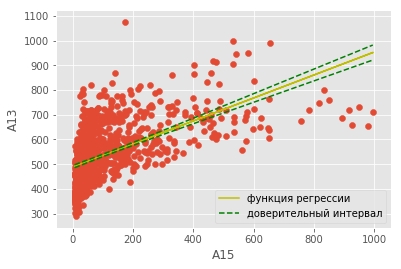

In [407]:
plt.plot(x, myRegr.predict(x), color = 'y', label='функция регрессии')
x_axis = np.arange(6,997)
high = []
low = []
for x1 in x_axis:
    high.append(myRegr.proveIntervals(x1, 0.1)[0])
    low.append(myRegr.proveIntervals(x1, 0.1)[1])
plt.plot(x_axis, high, color='g', label='доверительный интервал', linestyle='--')
plt.plot(x_axis, low, color='g', linestyle='--')
plt.xlabel(x.name)
plt.ylabel(y.name)
plt.legend()
plt.scatter(x,y)

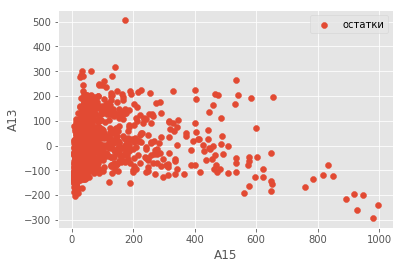

In [409]:
x_axis = np.arange(6,997)
plt.scatter(x, y-myRegr.predict(x),label='остатки')
plt.xlabel(x.name)
plt.ylabel(y.name)
plt.legend()

Проверка значимости линейной регрессионной модели

In [410]:
myRegr.significal()

(520.7165626841155, 1.1102230246251565e-16)

9.2 Линейная регрессионная модель общего вида

In [412]:
task

,№ задания Вариант,1.1,1.2,"2.1, 3.1","2.2, 3.2","2.3, 3.3","2.4, 3.4",4,5,6,7,8.1,8.2,9.1,9.2,9.3
12,13,A5 A6 A8,A8,A8,A8,A5 A8,A5 A8,A8,A5 A8,A9 A14,A4 A8,A5 A8,A5 A6 A8,A15 A13,A15 A13,A15 A5 A13


In [413]:
myRegr2 = Regression(2)
myRegr2.fit(x.values,y.values)
myRegr2.c

array([ 4.60118242e+02,  1.02244678e+00, -8.90535777e-04])

In [414]:
mylr2 = np.polynomial.polynomial.polyfit(x.values, y.values, deg=2)
mylr2

array([ 4.60118242e+02,  1.02244678e+00, -8.90535777e-04])

In [423]:
Dregr2 = sum((np.mean(y)-myRegr2.predict(x[i]))**2 for i in range(len(x)))
Dregr2 /= len(x)
print('D regr2', Dregr2,'несмещ',Dregr2*len(x)/2)

D regr2 5844.452186347221 несмещ 3135548.597975284


In [424]:
Dres2 = myRegr2.Dres
print('D остаточная',Dres2,'несмещ', Dres2*len(x)/(len(x)-3))

D остаточная 8186.039721699912 несмещ 8208.991234938323


In [425]:
print('Dregr2 + Dres2 =',Dregr2+Dres2)

Dregr2 + Dres2 = 14030.491908047134


In [426]:
np.var(y), sts.describe(y)[3]

(14030.491908047135, 14043.580053483745)

In [427]:
#КО и КД
nusquare2 = Dregr2 / (Dregr2 + Dres2)
print('КД =', nusquare2)
print('КО =', np.sqrt(nusquare2))

КД = 0.41655361940625607
КО = 0.645409652396256


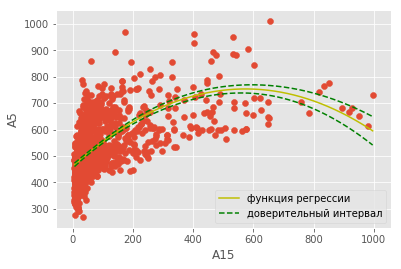

In [448]:
x_axis = np.arange(6,997)
plt.plot(x_axis, myRegr2.predict(x_axis), color = 'y', label='функция регрессии')
high = []
low = []
for x1 in x_axis:
    high.append(myRegr2.proveIntervals(x1, 0.1)[0])
    low.append(myRegr2.proveIntervals(x1, 0.1)[1])
plt.plot(x_axis, high, color='g', label='доверительный интервал', linestyle='--')
plt.plot(x_axis, low, color='g',linestyle='--')
plt.xlabel(x.name)
plt.ylabel(y.name)
plt.legend()
plt.scatter(x,y)

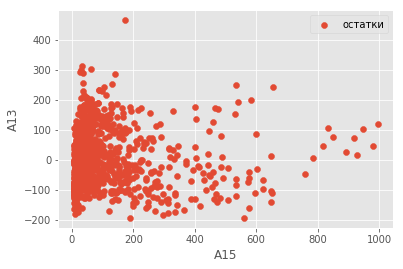

In [434]:
plt.scatter(x, y-myRegr2.predict(x),label='остатки')
plt.xlabel(x.name)
plt.ylabel(y.name)
plt.legend()

In [435]:
myRegr2.significal()

(381.9651536025601, 1.1102230246251565e-16)

9.3 Множественная линейная регрессионная модель

In [436]:
task

,№ задания Вариант,1.1,1.2,"2.1, 3.1","2.2, 3.2","2.3, 3.3","2.4, 3.4",4,5,6,7,8.1,8.2,9.1,9.2,9.3
12,13,A5 A6 A8,A8,A8,A8,A5 A8,A5 A8,A8,A5 A8,A9 A14,A4 A8,A5 A8,A5 A6 A8,A15 A13,A15 A13,A15 A5 A13


In [437]:
x = DF['A15']
y = DF['A5']
z = DF['A13']

In [438]:
mylr3 = lr().fit(np.array((x.values, y.values)).transpose(),z.values)
mylr3.coef_, mylr3.intercept_

(array([0.03709283, 0.93569174]), 40.18020659912963)

In [439]:
from mpl_toolkits.mplot3d import Axes3D

In [440]:
sts.describe(y)

DescribeResult(nobs=1073, minmax=(270, 1009), mean=526.4836905871389, variance=13868.856310247458, skewness=0.6786486256734204, kurtosis=0.5304432832288937)

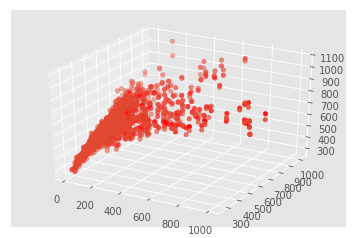

In [441]:
fig = plt.figure()
ax = plt.axes(projection="3d")
ax.scatter3D(x.values, y.values, z.values)
ax.scatter3D(x.values, y.values, mylr3.predict(np.array((x.values, y.values)).transpose()), color='r')

In [442]:
Dregr3 = sum((np.mean(z)-mylr3.predict(np.array((x.values, y.values)).transpose()))**2)
Dregr3 /= len(x)
print('D regr3', Dregr3,'несмещ', Dregr3*len(x)/2)

D regr3 12834.702435338599 несмещ 6885817.856559158


In [443]:
Dres3 = sum((mylr3.predict(np.array((x.values, y.values)).transpose())-z)**2)
Dres3 /= len(x)
print('D остаточная', Dres3,'несмещ', Dres3*len(x)/(len(x)-3))

D остаточная 1195.7894727085095 несмещ 1199.1421534731128


In [444]:
print('Dregr3 + Dres3 =',Dregr3+Dres3)

Dregr3 + Dres3 = 14030.491908047108


In [445]:
np.var(z), sts.describe(z)[3]

(14030.491908047135, 14043.580053483745)

In [446]:
#КО и КД
nusquare3 = Dregr3 / (Dregr3 + Dres3)
print('МКД =', nusquare3)
print('МКО =', np.sqrt(nusquare3))

МКД = 0.91477209205882
МКО = 0.9564371866771074


In [447]:
sum((mylr3.predict(np.array((x.values, y.values)).transpose())-z)**2)/len(x) #SSE

1195.7894727085095

In [144]:
for i in range(10):
    print(mylr3.predict(np.array((x.values, y.values)).transpose())[i], z[i])

465.20681347368276 487
684.8096094195836 677
539.2377394080576 559
617.0892266093216 670
455.9444324702645 423
454.93455507471225 477
476.95441394197064 478
596.4573907193211 546
507.415849207948 523
516.1254464455416 503
